In [83]:
import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [84]:
bootEMPath="/mnt/scratch7/avi/equi-libra/salmonData/test/emBoot/aux_info/"
testEMPath="/mnt/scratch7/avi/equi-libra/salmonData/test/test/aux_info/"
gibbsEMPath="/mnt/scratch7/avi/equi-libra/salmonData/test/emGibbs/aux_info/"
bootVBEMPath="/mnt/scratch7/avi/equi-libra/salmonData/test/vbBoot/aux_info/"
gibbsVBEMPath="/mnt/scratch7/avi/equi-libra/salmonData/test/vbGibbs/aux_info/"

In [85]:
bootEMFiles=[bootEMPath+str(x)+'.sf' for x in range(1,101)]
testEMFiles=[testEMPath+str(x)+'.sf' for x in range(1,101)]
gibbsEMFiles=[gibbsEMPath+str(x)+'.sf' for x in range(1,101)]
bootVBEMFiles=[bootVBEMPath+str(x)+'.sf' for x in range(1,101)]
gibbsVBEMFiles=[gibbsVBEMPath+str(x)+'.sf' for x in range(1,101)]
eqFile="/mnt/scratch7/avi/equi-libra/salmonData/test/emGibbs/aux_info/eq_classes.txt"

In [86]:
def readFiles(paths):
    for index, path in enumerate(paths):
        with open(path) as f:
            if index == 0:
                tpm = pd.read_table(f, header=0).set_index("Name").rename(columns={'TPM': '0'}).drop(['Length','EffectiveLength','NumReads'], 1)
            else:
                tpm[index] = pd.read_table(f, header=0).set_index("Name").drop(['Length','EffectiveLength','NumReads'], 1)
    return tpm
def readTruth(tfile):
    with open(tfile) as f:
        tpm = pd.read_table(f, header=0).set_index("Name")['TPM']
    return tpm
def dist_is_between(dist, truth):
    dist = sorted(dist)
    is_bet = []
    for skip in range(1, 25):
        if dist[skip] <= truth and truth <=dist[-(skip+1)]:
            is_bet.append(True)
        else:
            is_bet.append(False)
    return is_bet
def get_bet(var):
    bet = []
    for txp in var.index:
        dist = var.loc[txp]
        truth = truthData[txp]
        bet.append(dist_is_between(dist, truth))
    return bet
def get_series(df):
    series = []
    for txp in df.index:
        dist = sorted(df.loc[txp])
        cv=[]
        for skip in range(1, 25):
            ndist = np.array(dist[skip:-skip])
            cv.append(ndist.std()/ndist.mean())
        series.append(cv)
    return series
def readEqClass(eqfile):
    eqClasses = {}    
    tnames = []

    with open(eqfile) as ifile:
        numTran = int(ifile.readline().rstrip())
        numEq = int(ifile.readline().rstrip())
        for i in xrange(numTran):
            tnames.append(ifile.readline().rstrip())

        for i in xrange(numEq):
            toks = map(int, ifile.readline().rstrip().split('\t'))
            nt = toks[0]
            tids = tuple(toks[1:-1])
            count = toks[-1]
            if tids in eqClasses:
                eqClasses[tids] += count
            else:
                eqClasses[tids] = count
    return eqClasses,tnames

In [87]:
bootEMData = readFiles(bootEMFiles)
gibbsEMData = readFiles(gibbsEMFiles)
testEMData = readFiles(testEMFiles)
bootVBEMData = readFiles(bootVBEMFiles)
gibbsVBEMData = readFiles(gibbsVBEMFiles)

In [88]:
b = bootEMData
g = gibbsEMData
t = testEMData
# b = bootVBEMData
# g = gibbsVBEMData
eq,tn = readEqClass(eqFile)

setUniTxps = set([])
setMMTxps = set([])
for txps in eq:
    if len(txps) == 1:
        setUniTxps.add(tn[txps[0]])
    else:
        for txp in txps:
            setMMTxps.add(tn[txp])

setBothTxps = setUniTxps & setMMTxps
setUniTxps = setUniTxps - setBothTxps
setMMTxps = setMMTxps - setBothTxps
setAlltxps = setBothTxps|setUniTxps|setMMTxps
setNoMapTxps = [x not in setAlltxps for x in tn]

In [89]:
len(setMMTxps)+len(setUniTxps)+len(setBothTxps)+sum(setNoMapTxps)

94359

#MULTI-Mapping ONLY

In [90]:
boolList = [x in setMMTxps for x in tn]

In [91]:
sb = b[boolList]
sg = g[boolList]
st = t[boolList]
# print np.corrcoef(x, y)
# print np.corr(x, y, method='spearman')

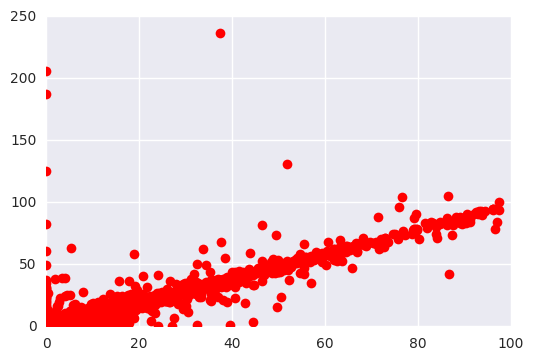

In [97]:
keep = sb.median(1) < 100
plt.plot(sb.median(1)[keep],sg.median(1)[keep], 'ro')

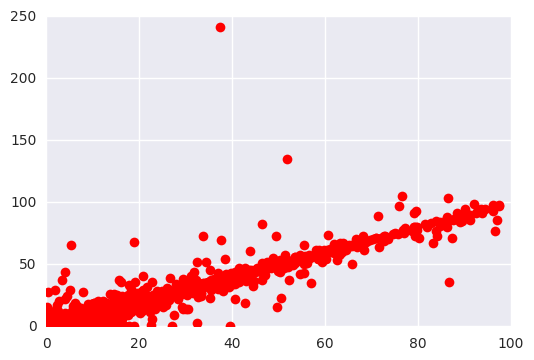

In [96]:
keep = sb.median(1) < 100
plt.plot(sb.median(1)[keep],st.median(1)[keep], 'ro')

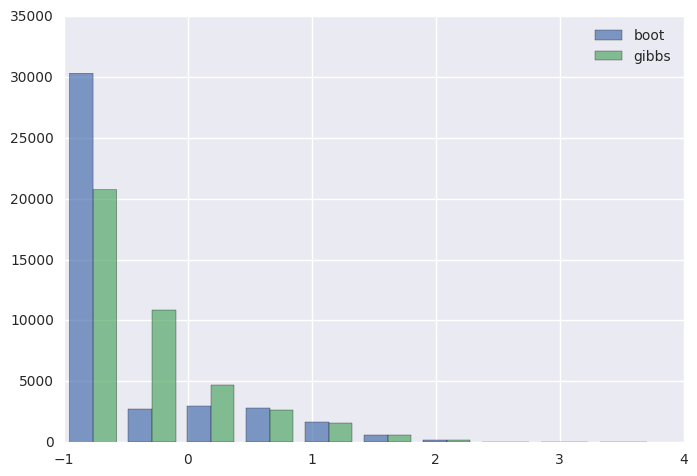

In [10]:
x = np.log10(sb.median(1).values+0.1)
y = np.log10(sg.median(1).values+0.1)
data = np.vstack([x, y]).T

plt.hist(data, alpha=0.7, label=['boot', 'gibbs'])
plt.legend(loc='upper right')

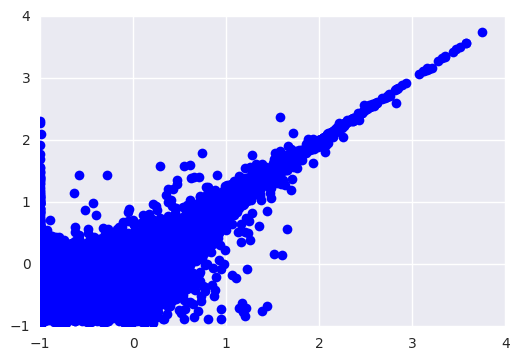

In [181]:
plt.plot(x,y, 'bo')

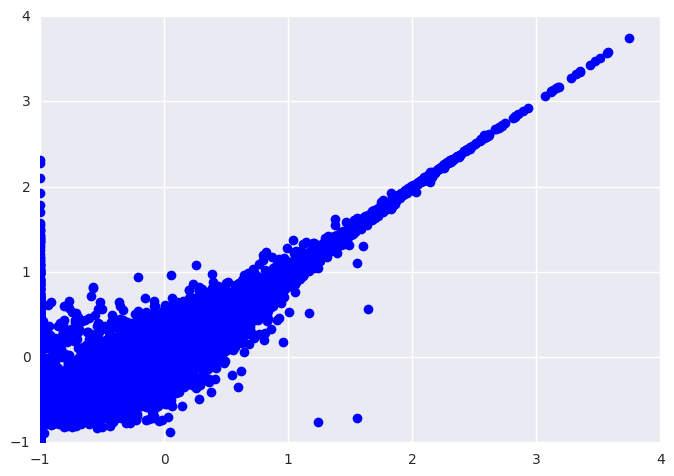

In [169]:
plt.plot(x,y, 'bo')

In [157]:
diff = sb.median(1) - sg.median(1)
[tn.index(i) for i in sg[diff<-80].index]

[25873, 29846, 36338, 37228]

In [34]:
# sg[diff<-50].index

In [158]:
tr = 29846
# print pd.concat([sb.loc[tn[tr]].rename('boots'), sg.loc[tn[tr]].rename('gibbs')], axis=1)

(array([ 30.,   4.,   0.,   4.,   4.,   6.,  12.,  21.,  11.,   8.]),
 array([  6.85603927e-06,   2.96026880e+01,   5.92053691e+01,
          8.88080502e+01,   1.18410731e+02,   1.48013412e+02,
          1.77616094e+02,   2.07218775e+02,   2.36821456e+02,
          2.66424137e+02,   2.96026818e+02]),
 <a list of 10 Patch objects>)

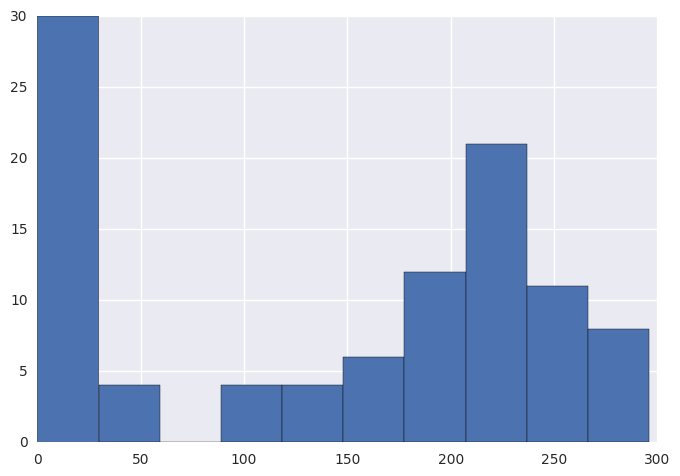

In [159]:
plt.hist(sg.loc[tn[tr]].values)
# plt.hist(sb.loc[tn[tr]].values)

In [57]:
#Read Alphas

In [145]:
alphasFile = "/mnt/scratch7/avi/equi-libra/salmonData/test/alphas.txt"
with open(alphasFile) as f:
    alphas = pd.read_table(f, header=None)

In [146]:
alphas[29846]

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: 29846, dtype: int64

In [62]:
cluster = [x for x in eq if 29846 in x ]

In [63]:
cluster

[(29841, 29842, 29843, 29844, 29845, 29846),
 (29841, 29842, 29843, 29844, 29846)]

In [84]:
tata = [x for x in eq if 29841 in x ]
tata

[(29841, 29842, 29843, 29844, 29845, 29846),
 (29841, 29842, 29843, 29845),
 (29841, 29842, 29844),
 (29841, 29842),
 (29841, 29842, 29843, 29844, 29846),
 (29841, 29842, 29843),
 (29841, 29842, 29843, 29844),
 (29841,),
 (29841, 29842, 29843, 29844, 29845),
 (29841, 29842, 29844, 29847),
 (29841, 29842, 29843, 29844, 29845, 29847)]

In [83]:
tete = set([])
toto = [tete.add(x) for le in tata for x in le]
tete

{29841, 29842, 29843, 29844, 29845, 29846, 29847}

In [117]:
classSet = set([])
lll = [classSet.add(x) for x in eq for tid in [29842, 29843, 29844, 29846] if tid in x ]

In [121]:
classSet

{(29841, 29842),
 (29841, 29842, 29843),
 (29841, 29842, 29843, 29844),
 (29841, 29842, 29843, 29844, 29845),
 (29841, 29842, 29843, 29844, 29845, 29846),
 (29841, 29842, 29843, 29844, 29845, 29847),
 (29841, 29842, 29843, 29844, 29846),
 (29841, 29842, 29843, 29845),
 (29841, 29842, 29844),
 (29841, 29842, 29844, 29847),
 (29842,),
 (29843,),
 (29844,)}

In [116]:
# pd.concat([alphas[x] for x in range(29841, 29848)], axis=1)

In [106]:
tata.loc[49]- tata.loc[0]

29842   -271
29843    231
29844   -265
29846    307
dtype: int64

In [129]:
pd.concat([tata.loc[x] for x in [0,49]], axis=1)

,0,49
29842,606,335
29843,155,386
29844,908,643
29846,0,307


In [126]:
[(x, eq[x]) for x in  classSet]

[((29841, 29842), 142),
 ((29841, 29842, 29843, 29844, 29845, 29847), 1),
 ((29841, 29842, 29843, 29844), 123),
 ((29841, 29842, 29844), 282),
 ((29843,), 5),
 ((29841, 29842, 29844, 29847), 5),
 ((29841, 29842, 29843, 29844, 29846), 829),
 ((29842,), 2),
 ((29841, 29842, 29843, 29844, 29845), 5),
 ((29841, 29842, 29843), 202),
 ((29841, 29842, 29843, 29845), 38),
 ((29841, 29842, 29843, 29844, 29845, 29846), 26),
 ((29844,), 12)]

In [136]:
tn[29847]

'ENST00000377978.3|ENSG00000112695.11|OTTHUMG00000015049.8|OTTHUMT00000365878.4|COX7A2-007|COX7A2|366|UTR5:1-56|CDS:57-366|'

In [82]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
